In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

In [2]:
from xgboost import XGBRegressor

In [3]:
data=pd.read_csv('BigMartSalesData.csv')
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [4]:
data.shape

(5681, 11)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [6]:
data['Item_Weight'].isnull().value_counts()

Item_Weight
False    4705
True      976
Name: count, dtype: int64

In [7]:
data['Outlet_Size'].isnull().value_counts()

Outlet_Size
False    4075
True     1606
Name: count, dtype: int64

In [8]:
data['Item_Weight'].fillna(data['Item_Weight'].mean(),inplace=True)

In [9]:
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300000,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500000,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600000,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300000,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [10]:
data['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [11]:
moutlet=data.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=(lambda x: x.mode()[0]))
moutlet

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [12]:
missing=data['Outlet_Size'].isnull()

In [13]:
data.loc[missing,'Outlet_Size']=data.loc[missing,'Outlet_Type'].apply(lambda x: moutlet[x])

In [14]:
data['Outlet_Size'].isnull().value_counts()

Outlet_Size
False    5681
Name: count, dtype: int64

In [15]:
import matplotlib.pyplot as plt

In [16]:
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300000,reg,0.038428,Dairy,87.3198,OUT017,2007,Small,Tier 2,Supermarket Type1
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,Small,Tier 3,Grocery Store
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Small,Tier 2,Supermarket Type1
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500000,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600000,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Small,Tier 2,Supermarket Type1
5679,FDJ26,15.300000,Regular,0.000000,Canned,214.6218,OUT017,2007,Small,Tier 2,Supermarket Type1


C:\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


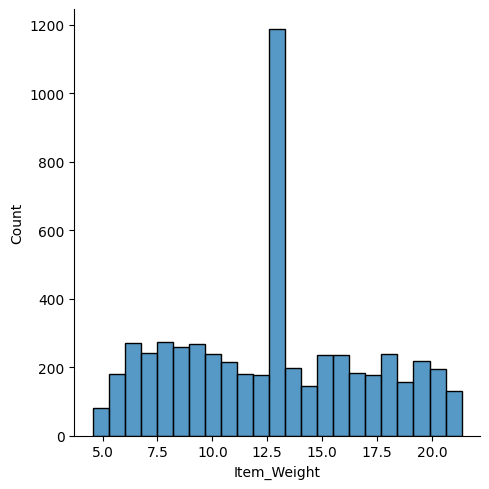

In [17]:
sns.displot(data['Item_Weight'])
plt.show()

C:\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


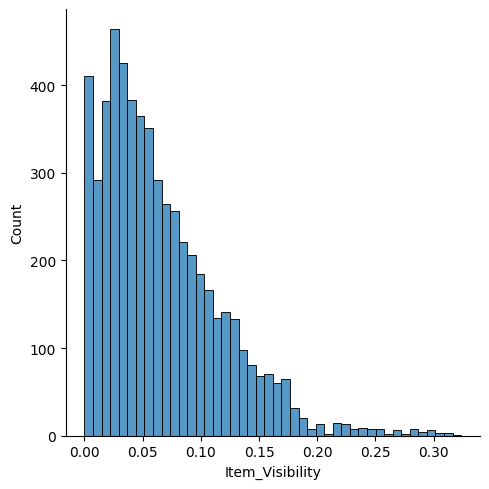

In [18]:
sns.displot(data['Item_Visibility'])
plt.show()

C:\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


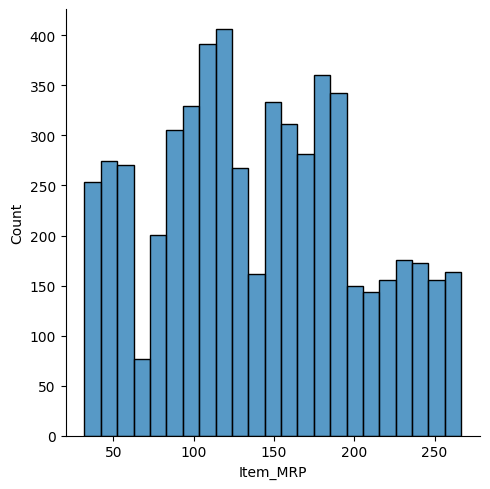

In [19]:
sns.displot(data['Item_MRP'])
plt.show()

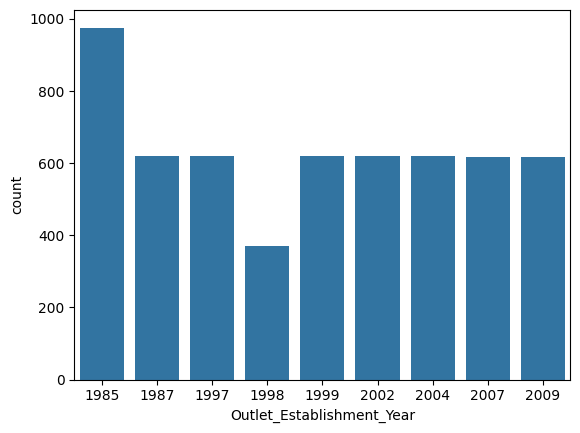

In [20]:
sns.countplot(x=data['Outlet_Establishment_Year'],data=data)
plt.show()

In [21]:
data['Item_Fat_Content'].unique()

array(['Low Fat', 'reg', 'Regular', 'LF', 'low fat'], dtype=object)

In [22]:
data.replace({'Item_Fat_Content':{'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}}, inplace=True)

In [23]:
encode=LabelEncoder()

In [24]:
data['Item_Identifier']=encode.fit_transform(data['Item_Identifier'])
data['Item_Fat_Content']=encode.fit_transform(data['Item_Fat_Content'])
data['Item_Type']=encode.fit_transform(data['Item_Type'])
data['Outlet_Identifier']=encode.fit_transform(data['Outlet_Identifier'])
data['Outlet_Size']=encode.fit_transform(data['Outlet_Size'])
data['Outlet_Location_Type']=encode.fit_transform(data['Outlet_Location_Type'])
data['Outlet_Type']=encode.fit_transform(data['Outlet_Type'])

In [25]:
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.750000,0,0.007565,13,107.8622,9,1999,1,0,1
1,1067,8.300000,1,0.038428,4,87.3198,2,2007,2,1,1
2,1406,14.600000,0,0.099575,11,241.7538,0,1998,2,2,0
3,809,7.315000,0,0.015388,13,155.0340,2,2007,2,1,1
4,1184,12.695633,1,0.118599,4,234.2300,5,1985,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...
5676,231,10.500000,1,0.013496,13,141.3154,8,1997,2,0,1
5677,306,7.600000,1,0.142991,15,169.1448,3,2009,1,2,2
5678,1412,10.000000,0,0.073529,8,118.7440,7,2002,2,1,1
5679,517,15.300000,1,0.000000,3,214.6218,2,2007,2,1,1


In [26]:
X=data.drop(columns='Outlet_Type',axis=1)
y=data['Outlet_Type']

In [27]:
print(X)

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                1103    20.750000                 0         0.007565   
1                1067     8.300000                 1         0.038428   
2                1406    14.600000                 0         0.099575   
3                 809     7.315000                 0         0.015388   
4                1184    12.695633                 1         0.118599   
...               ...          ...               ...              ...   
5676              231    10.500000                 1         0.013496   
5677              306     7.600000                 1         0.142991   
5678             1412    10.000000                 0         0.073529   
5679              517    15.300000                 1         0.000000   
5680              987     9.500000                 1         0.104720   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0            13  107.8622                  9    

In [28]:
y

0       1
1       1
2       0
3       1
4       3
       ..
5676    1
5677    2
5678    1
5679    1
5680    1
Name: Outlet_Type, Length: 5681, dtype: int32

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=2)

In [31]:
print(X.shape,Xtrain.shape,Xtest.shape)

(5681, 10) (4544, 10) (1137, 10)


In [32]:
print(y.shape,ytrain.shape,ytest.shape)

(5681,) (4544,) (1137,)


In [33]:
model=XGBRegressor()

In [34]:
model.fit(Xtrain,ytrain)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [35]:
pred=model.predict(Xtest)

In [36]:
pred

array([4.7155383e-05, 9.9999815e-01, 9.9999815e-01, ..., 1.0000111e+00,
       9.9999815e-01, 1.0000111e+00], dtype=float32)

In [37]:
r2=metrics.r2_score(ytest,pred)

In [38]:
r2

0.9999999990905291

C:\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


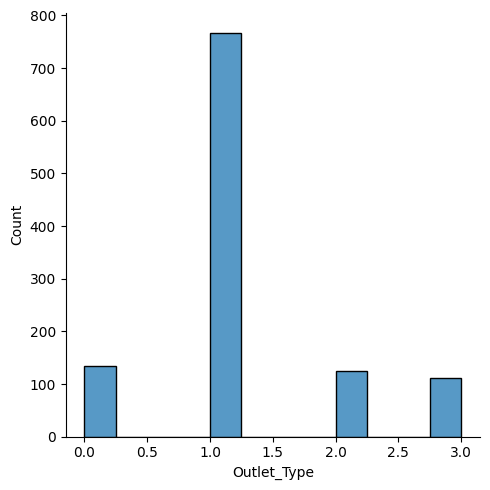

In [39]:
sns.displot(data=ytest)
plt.show()

In [40]:
ytest

3746    0
4342    1
3682    1
3944    2
1660    1
       ..
4239    2
5346    0
739     1
3475    1
4068    1
Name: Outlet_Type, Length: 1137, dtype: int32

In [41]:
pred

array([4.7155383e-05, 9.9999815e-01, 9.9999815e-01, ..., 1.0000111e+00,
       9.9999815e-01, 1.0000111e+00], dtype=float32)